In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [16]:
data = pd.read_csv(r'C:\Users\osakue\Desktop\advanced data fr project\UK_Accident.csv')

In [17]:
data.head(5)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [18]:
data.shape

(1504150, 33)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [20]:
data.isna().sum()

Unnamed: 0                                          0
Accident_Index                                      0
Location_Easting_OSGR                             101
Location_Northing_OSGR                              0
Longitude                                         101
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              117
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                 

In [21]:
data.dropna(axis=0, inplace=True)

In [22]:
data.isna().sum()

Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class      

In [23]:
data.shape

(1395848, 33)

## Exploratory Analysis

In [24]:
# What is the number of casualties on each day of the week?
df1=pd.DataFrame(data.groupby('Day_of_Week')['Number_of_Casualties'].sum()).reset_index()
df1

,Day_of_Week,Number_of_Casualties
0,1,222484
1,2,264370
2,3,274451
3,4,277091
4,5,278417
5,6,308527
6,7,264338


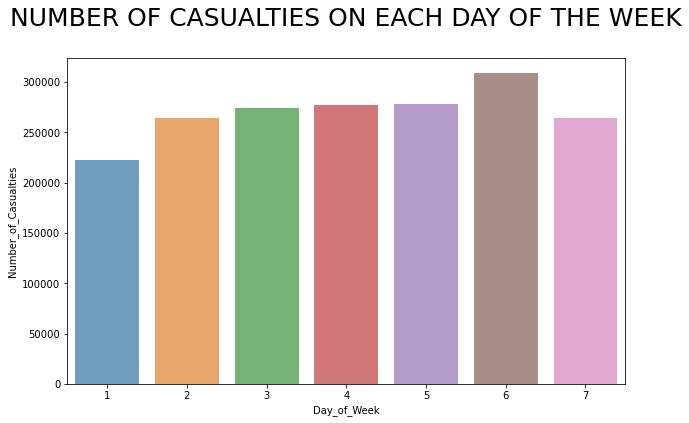

In [25]:
plt.figure(figsize=(10,6))
plt.title('NUMBER OF CASUALTIES ON EACH DAY OF THE WEEK', fontsize=25, pad=32)
sns.barplot(x='Day_of_Week', y='Number_of_Casualties', alpha=0.7,data=df1);

In [28]:
# The maximum and minimum speed limit on the roads the accidents happened on each day of the week


# Maximum speed limit on each weekday
df2= pd.DataFrame(data.groupby('Day_of_Week')['Speed_limit'].max()).reset_index()
df2


,Day_of_Week,Speed_limit
0,1,70
1,2,70
2,3,70
3,4,70
4,5,70
5,6,70
6,7,70


In [29]:
# Minimum speed Limit on each weekday
df3= pd.DataFrame(data.groupby('Day_of_Week')['Speed_limit'].min()).reset_index()
df3

,Day_of_Week,Speed_limit
0,1,20
1,2,10
2,3,20
3,4,20
4,5,10
5,6,15
6,7,10


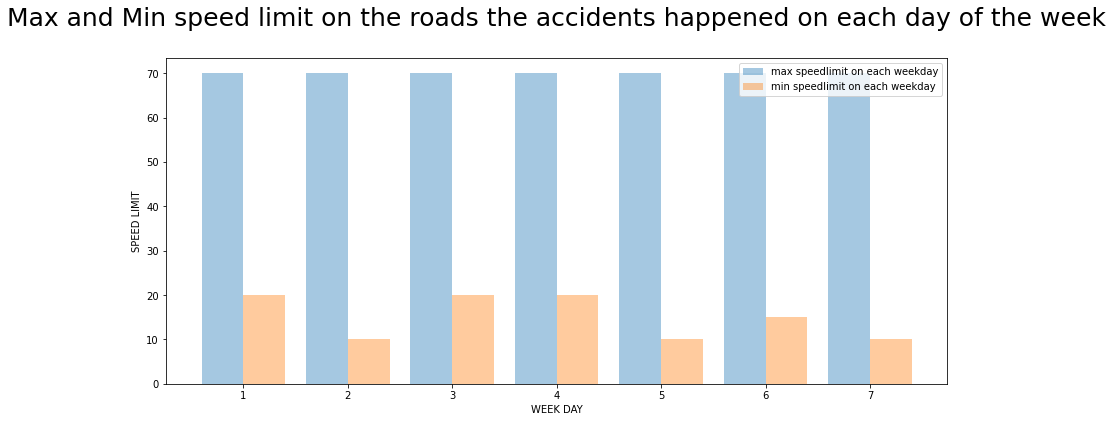

In [30]:
plt.figure(figsize=(14,6))
plt.title('Max and Min speed limit on the roads the accidents happened on each day of the week', fontsize=25, pad=32)

plt.bar(df2['Day_of_Week'], df2['Speed_limit'], align='edge', width=-0.4, alpha=0.4)
plt.bar(df3['Day_of_Week'], df3['Speed_limit'],align='edge', width=0.4, alpha=0.4);
plt.xlabel('WEEK DAY')
plt.ylabel('SPEED LIMIT')
plt.legend(['max speedlimit on each weekday', 'min speedlimit on each weekday']);

In [31]:
# The importance of Light and Weather conditions in accident severity

df4= pd.DataFrame(data.groupby('Accident_Severity')['Weather_Conditions'].value_counts())
df4

Weather_Conditions
Accident_Severity Weather_Conditions                            
1                 Fine without high winds                  14579
                  Raining without high winds                1567
                  Fine with high winds                       297
                  Other                                      262
                  Raining with high winds                    233
                  Unknown                                    229
                  Fog or mist                                167
                  Snowing without high winds                  68
                  Snowing with high winds                     10
2                 Fine without high winds                 155336
                  Raining without high winds               18876
                  Other                                     3328
                  Unknown                                   2529
                  Fine with high winds                      2369
                  Raining with high winds                   2313
                  Fog or mist                               1057
                  Snowing without high winds                 905
                  Snowing with high winds                    162
3                 Fine without high winds                 954554
                  Raining without high winds              139703
                  Other                                    27398
                  Unknown                                  24041
                  Raining with high winds                  15267
                  Fine with high winds                     13931
                  Snowing without high winds                8861
                  Fog or mist                               6421
                  Snowing with high winds                   1385

In [32]:
df4=df4.rename({'Weather_Conditions':'counts'}, axis=1)
df5=df4.reset_index()
df5

,Accident_Severity,Weather_Conditions,counts
0,1,Fine without high winds,14579
1,1,Raining without high winds,1567
2,1,Fine with high winds,297
3,1,Other,262
4,1,Raining with high winds,233
5,1,Unknown,229
6,1,Fog or mist,167
7,1,Snowing without high winds,68
8,1,Snowing with high winds,10
9,2,Fine without high winds,155336


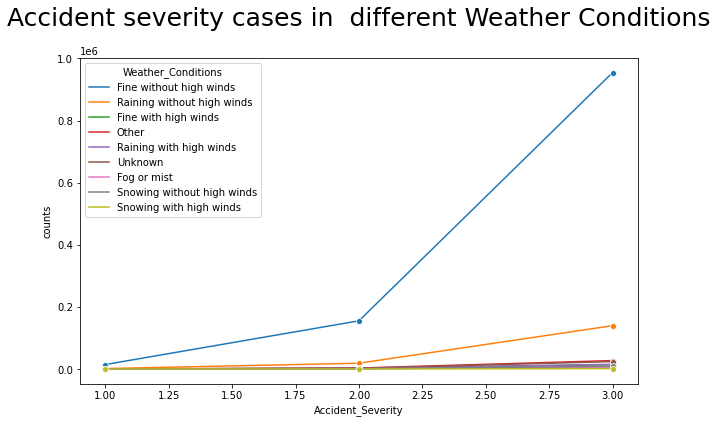

In [33]:
plt.figure(figsize=(10,6))
plt.title('Accident severity cases in  different Weather Conditions', fontsize=25, pad=32)
sns.lineplot(y='counts', x='Accident_Severity', hue='Weather_Conditions',marker='o',data=df5);


In [34]:
# Fine weather without high winds had the highest number of accident with highest severity 

In [35]:
df6= pd.DataFrame(data.groupby('Accident_Severity')['Light_Conditions'].value_counts())


In [36]:
df6=df6.rename({'Light_Conditions':'counts'}, axis=1)
df7=df6.reset_index()
df7

,Accident_Severity,Light_Conditions,counts
0,1,Daylight: Street light present,10184
1,1,Darkness: Street lights present and lit,3749
2,1,Darkeness: No street lighting,3181
3,1,Darkness: Street lighting unknown,184
4,1,Darkness: Street lights present but unlit,114
5,2,Daylight: Street light present,128937
6,2,Darkness: Street lights present and lit,40967
7,2,Darkeness: No street lighting,14084
8,2,Darkness: Street lighting unknown,1996
9,2,Darkness: Street lights present but unlit,891


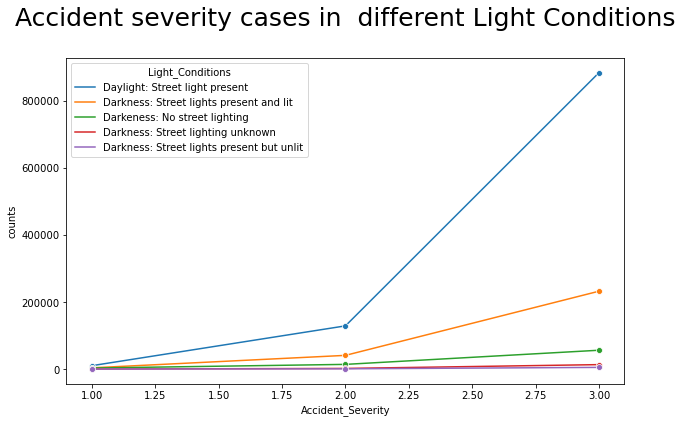

In [37]:
plt.figure(figsize=(10,6))
plt.title('Accident severity cases in  different Light Conditions', fontsize=25, pad=32)
sns.lineplot(y='counts', x='Accident_Severity', hue='Light_Conditions',marker='o',data=df7);


In [38]:
# Daylight with street light present had the highest occurence of accident with highest severity level

In [39]:
#Weather condition involving number of accident cases

df8= (pd.DataFrame(data.groupby('Weather_Conditions')['Number_of_Casualties'].sum())).reset_index()
df8

,Weather_Conditions,Number_of_Casualties
0,Fine with high winds,22943
1,Fine without high winds,1515824
2,Fog or mist,11048
3,Other,42089
4,Raining with high winds,25070
5,Raining without high winds,224169
6,Snowing with high winds,2180
7,Snowing without high winds,13310
8,Unknown,33045


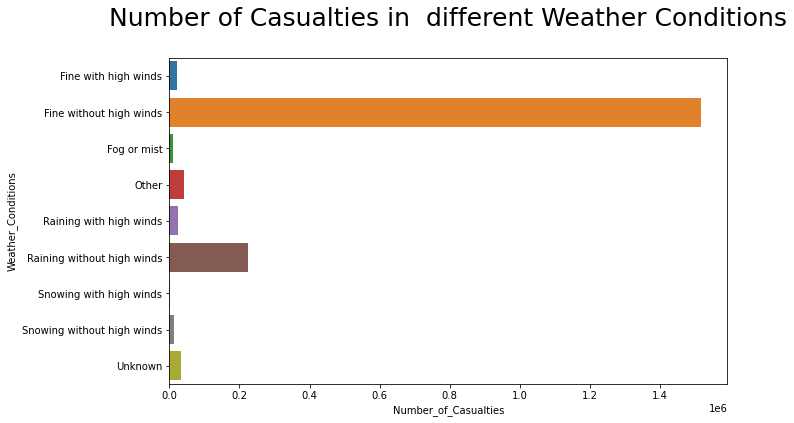

In [40]:
plt.figure(figsize=(10,6))
plt.title('Number of Casualties in  different Weather Conditions', fontsize=25, pad=32)
sns.barplot(x='Number_of_Casualties', y='Weather_Conditions',data=df8);


In [41]:
#Light condition involving number of accident cases

df9= (pd.DataFrame(data.groupby('Light_Conditions')['Number_of_Casualties'].sum())).reset_index()
df9

,Light_Conditions,Number_of_Casualties
0,Darkeness: No street lighting,113923
1,Darkness: Street lighting unknown,20318
2,Darkness: Street lights present and lit,376529
3,Darkness: Street lights present but unlit,8318
4,Daylight: Street light present,1370590


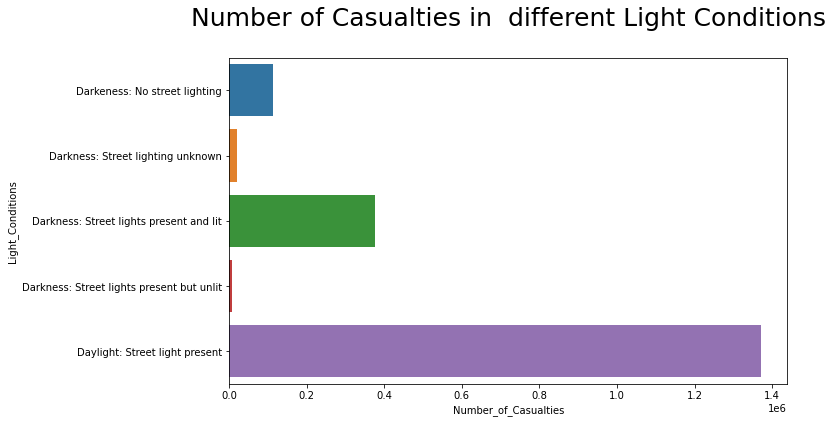

In [42]:
plt.figure(figsize=(10,6))
plt.title('Number of Casualties in  different Light Conditions', fontsize=25, pad=32)
sns.barplot(x='Number_of_Casualties', y='Light_Conditions',data=df9);


In [43]:
#The Latitude and Longitude of accident on worldmap

In [71]:
df12=data[['Latitude','Longitude']]

In [ ]:
#using  geopandas to convert long and lat to points
df_geo=gpd.GeoDataFrame(df12, geometry=gpd.points_from_xy(
data.Longitude, data.Latitude))

In [74]:
df_geo.head(5)

,Latitude,Longitude,geometry
0,51.489096,-0.191170,POINT (-0.19117 51.48910)
1,51.520075,-0.211708,POINT (-0.21171 51.52007)
2,51.525301,-0.206458,POINT (-0.20646 51.52530)
3,51.482442,-0.173862,POINT (-0.17386 51.48244)
4,51.495752,-0.156618,POINT (-0.15662 51.49575)


In [89]:
world_data= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


Text(0.5, 1.0, 'UK Accident Location on Map')

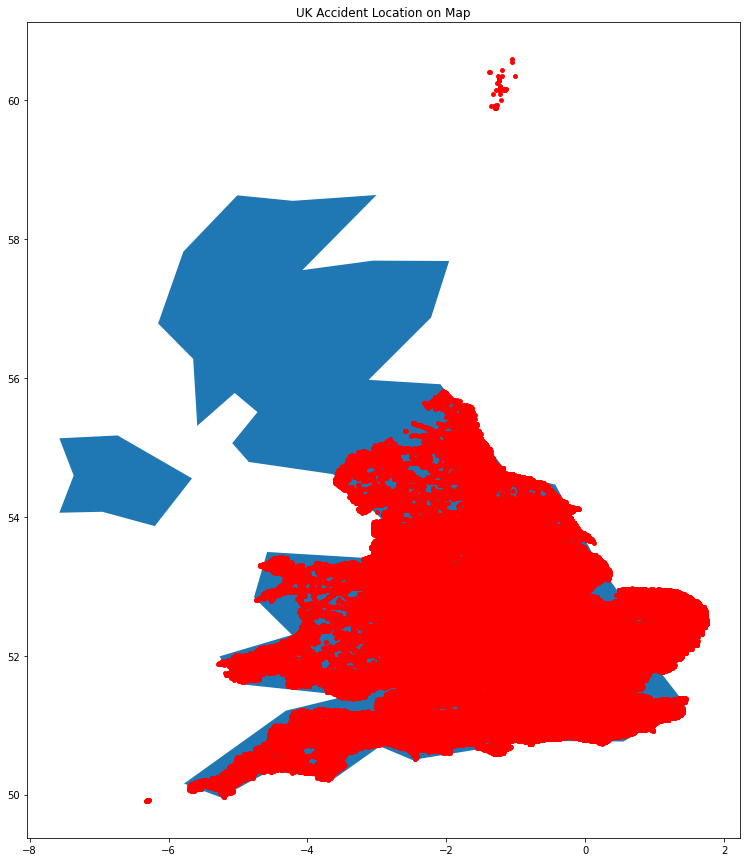

In [95]:

df_geo.plot(ax=world_data[world_data.name == 'United Kingdom'].plot(figsize=(15, 15)), marker='o', color='red', markersize=15);
plt.title('UK Accident Location on Map')

In [45]:
data.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [66]:
#What is the level of Accident severity on each road type
df10=pd.DataFrame(data.groupby('Accident_Severity')['Road_Type'].value_counts())
df10

Road_Type
Accident_Severity Road_Type                    
1                 Single carriageway      13229
                  Dual carriageway         3532
                  Roundabout                293
                  One way street            187
                  Slip road                 119
                  Unknown                    52
2                 Single carriageway     148920
                  Dual carriageway        24163
                  Roundabout               8303
                  One way street           3532
                  Slip road                1262
                  Unknown                   695
3                 Single carriageway     882943
                  Dual carriageway       177725
                  Roundabout              86495
                  One way street          24814
                  Slip road               13116
                  Unknown                  6468

In [70]:
df10=df10.rename({'Road_Type':'counts'}, axis=1)

df11=df10.reset_index()
df11

,Accident_Severity,Road_Type,counts
0,1,Single carriageway,13229
1,1,Dual carriageway,3532
2,1,Roundabout,293
3,1,One way street,187
4,1,Slip road,119
5,1,Unknown,52
6,2,Single carriageway,148920
7,2,Dual carriageway,24163
8,2,Roundabout,8303
9,2,One way street,3532


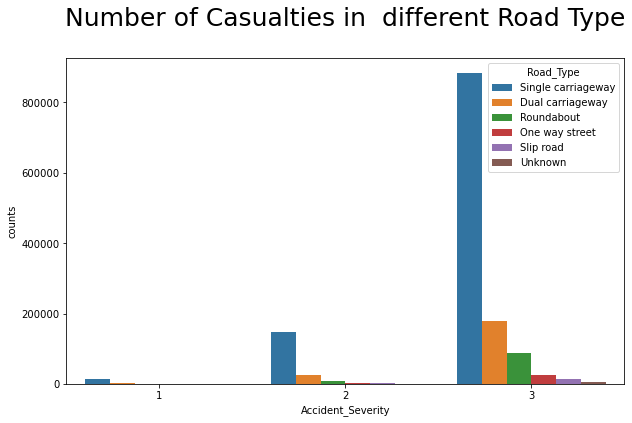

In [81]:
plt.figure(figsize=(10,6))
plt.title('Number of Casualties in  different Road Type', fontsize=25, pad=32)
sns.barplot(hue='Road_Type', x= 'Accident_Severity', y='counts',data=df11);